In [ ]:
#Prepare rules for the all the data sets
#1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
#2) Change the minimum length in apriori algorithm
#3) Visulize the obtained rules using different plots

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import association_rules, apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load your dataset
df = pd.read_csv('/content/book.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming 'frequent_itemsets' is the DataFrame containing frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Association Rules (Min Support: 0.1, Min Confidence: 0.5, Min Length: 2)
              antecedents          consequents  antecedent support  \
0             (YouthBks)           (ChildBks)              0.2475   
1             (ChildBks)            (CookBks)              0.4230   
2              (CookBks)           (ChildBks)              0.4310   
3             (DoItYBks)           (ChildBks)              0.2820   
4               (RefBks)           (ChildBks)              0.2145   
5               (ArtBks)           (ChildBks)              0.2410   
6              (GeogBks)           (ChildBks)              0.2760   
7             (YouthBks)            (CookBks)              0.2475   
8             (DoItYBks)            (CookBks)              0.2820   
9               (RefBks)            (CookBks)              0.2145   
10              (ArtBks)            (CookBks)              0.2410   
11             (GeogBks)            (CookBks)              0.2760   
12            (ItalCook)    

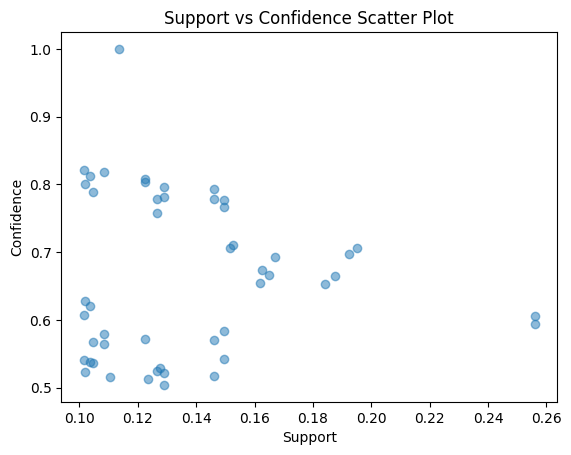

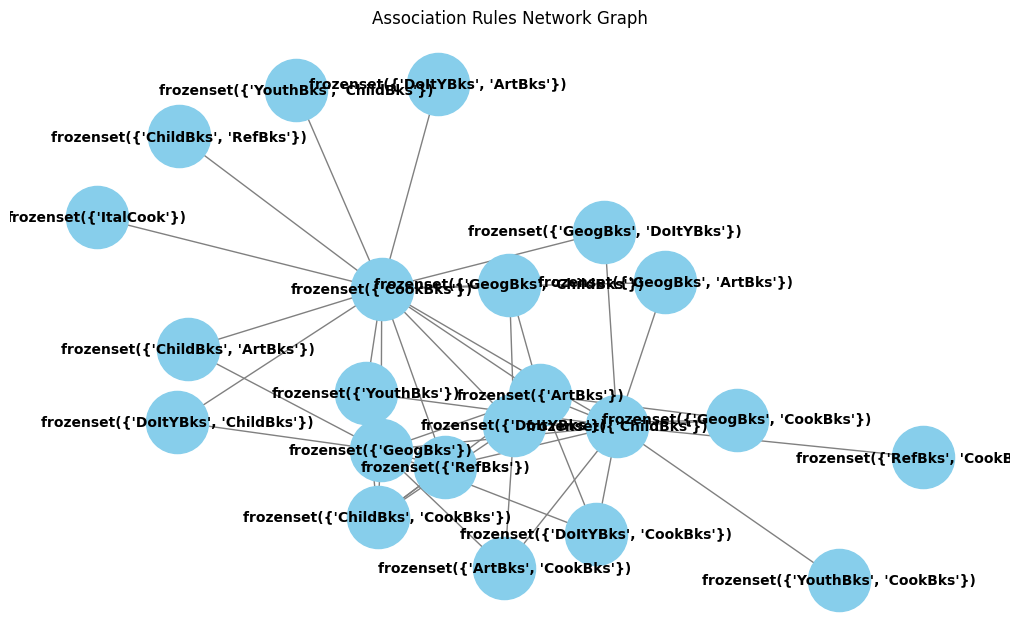


Association Rules (Min Support: 0.1, Min Confidence: 0.6, Min Length: 2)
              antecedents consequents  antecedent support  consequent support  \
0             (YouthBks)  (ChildBks)              0.2475               0.423   
1             (ChildBks)   (CookBks)              0.4230               0.431   
2             (DoItYBks)  (ChildBks)              0.2820               0.423   
3               (RefBks)  (ChildBks)              0.2145               0.423   
4               (ArtBks)  (ChildBks)              0.2410               0.423   
5              (GeogBks)  (ChildBks)              0.2760               0.423   
6             (YouthBks)   (CookBks)              0.2475               0.431   
7             (DoItYBks)   (CookBks)              0.2820               0.431   
8               (RefBks)   (CookBks)              0.2145               0.431   
9               (ArtBks)   (CookBks)              0.2410               0.431   
10             (GeogBks)   (CookBks)         

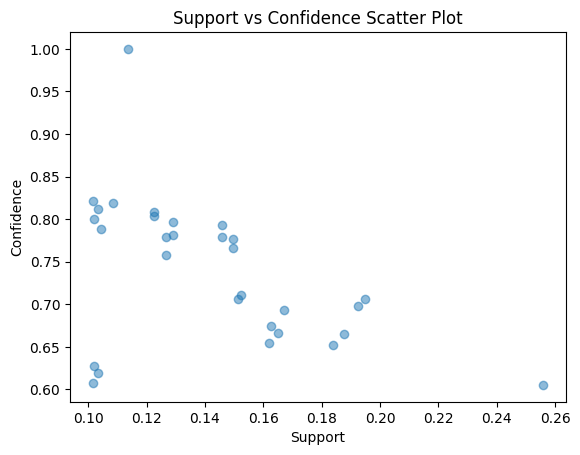

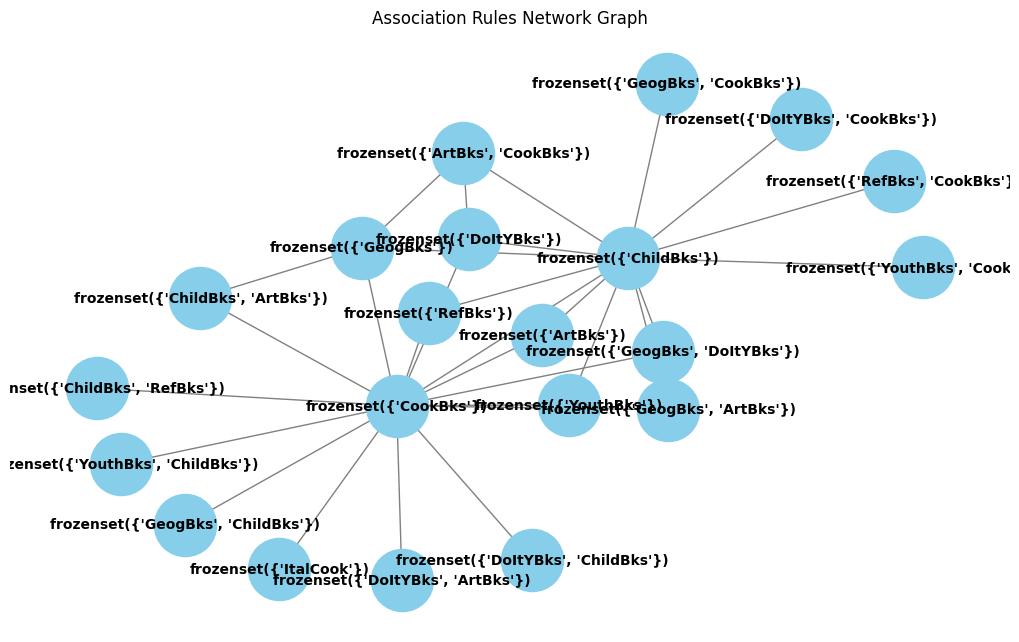


Association Rules (Min Support: 0.1, Min Confidence: 0.7, Min Length: 2)
              antecedents consequents  antecedent support  consequent support  \
0               (RefBks)  (ChildBks)              0.2145               0.423   
1              (GeogBks)  (ChildBks)              0.2760               0.423   
2               (RefBks)   (CookBks)              0.2145               0.431   
3             (ItalCook)   (CookBks)              0.1135               0.431   
4   (YouthBks, ChildBks)   (CookBks)              0.1650               0.431   
5    (YouthBks, CookBks)  (ChildBks)              0.1620               0.423   
6   (DoItYBks, ChildBks)   (CookBks)              0.1840               0.431   
7    (DoItYBks, CookBks)  (ChildBks)              0.1875               0.423   
8     (ChildBks, RefBks)   (CookBks)              0.1515               0.431   
9      (RefBks, CookBks)  (ChildBks)              0.1525               0.423   
10    (ChildBks, ArtBks)   (CookBks)         

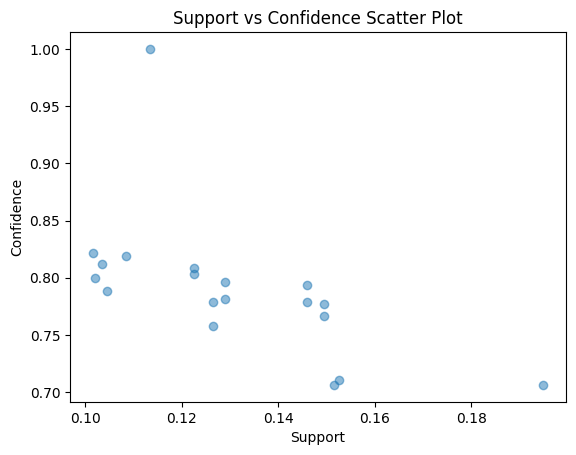

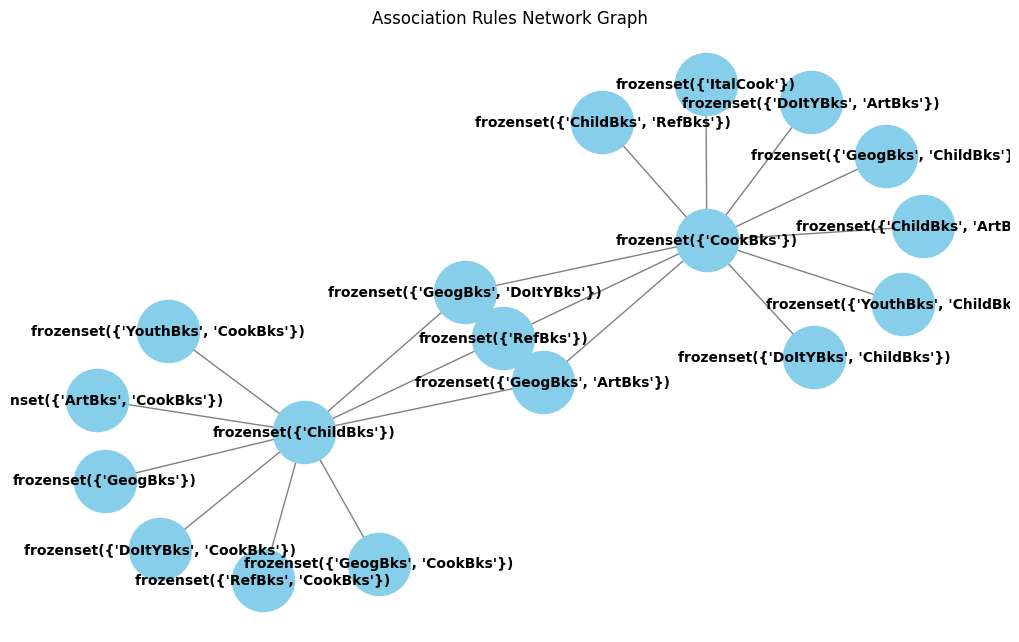

In [ ]:
# Specify different confidence thresholds
confidence_thresholds = [0.5, 0.6, 0.7]

for confidence in confidence_thresholds:
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    # Check if the resulting DataFrame has the 'support' column
    if 'support' in rules.columns:
        print(f"\nAssociation Rules (Min Support: 0.1, Min Confidence: {confidence}, Min Length: 2)\n", rules)
    else:
        print(f"\nAssociation Rules (Min Support: 0.1, Min Confidence: {confidence}, Min Length: 2)\nEmpty DataFrame")

    # Visualization - Scatter plot for support vs. confidence
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence Scatter Plot')
    plt.show()

    # Visualization - Network graph of rules
    plt.figure(figsize=(10, 6))
    G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents')
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=10, font_color='black', font_weight='bold')
    plt.title('Association Rules Network Graph')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.1, Confidence=0.5, Min Length=2:

             antecedents consequents  antecedent support  consequent support  \
16  (YouthBks, ChildBks)   (CookBks)              0.1650              0.4310   
17   (YouthBks, CookBks)  (ChildBks)              0.1620              0.4230   
18   (ChildBks, CookBks)  (YouthBks)              0.2560              0.2475   
20  (DoItYBks, ChildBks)   (CookBks)              0.1840              0.4310   
21   (DoItYBks, CookBks)  (ChildBks)              0.1875              0.4230   
22   (ChildBks, CookBks)  (DoItYBks)              0.2560              0.2820   
24    (ChildBks, RefBks)   (CookBks)              0.1515              0.4310   
25     (RefBks, CookBks)  (ChildBks)              0.1525              0.4230   
27    (ChildBks, ArtBks)   (CookBks)              0.1625              0.4310   
28     (ArtBks, CookBks)  (ChildBks)              0.1670              0.4230   
30   (GeogBks, ChildBks)   (CookBks)              0.1950          

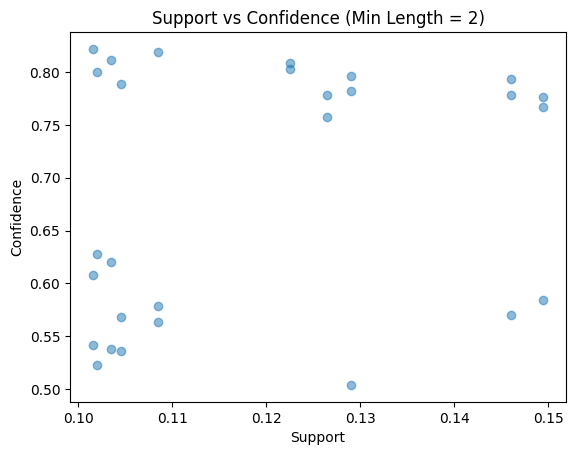

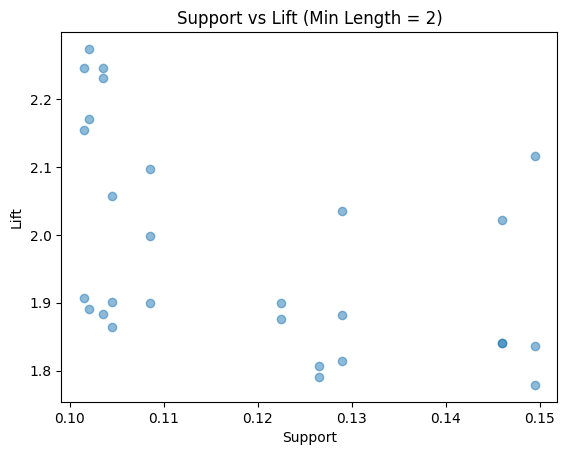

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.1, Confidence=0.5, Min Length=3:

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


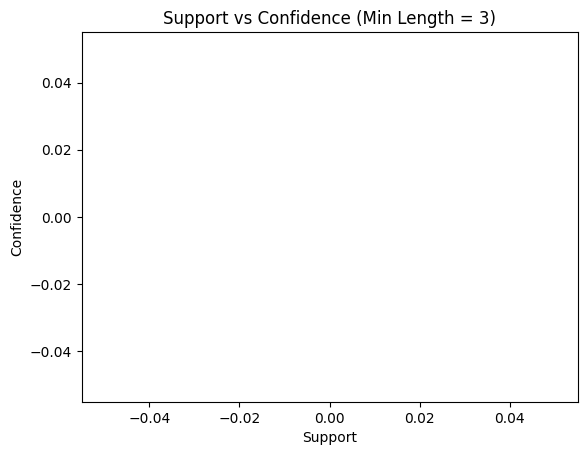

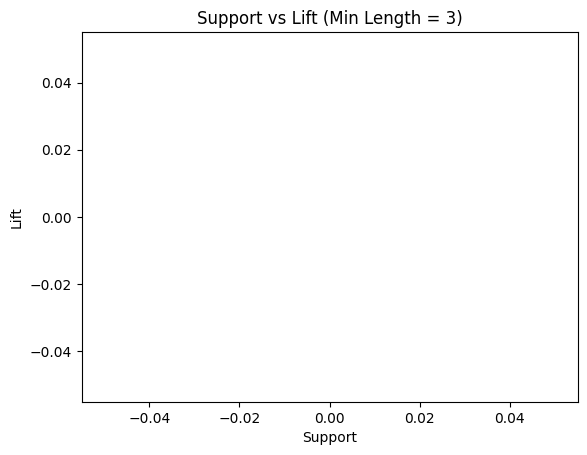

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.1, Confidence=0.6, Min Length=2:

             antecedents consequents  antecedent support  consequent support  \
12  (YouthBks, ChildBks)   (CookBks)              0.1650               0.431   
13   (YouthBks, CookBks)  (ChildBks)              0.1620               0.423   
14  (DoItYBks, ChildBks)   (CookBks)              0.1840               0.431   
15   (DoItYBks, CookBks)  (ChildBks)              0.1875               0.423   
16    (ChildBks, RefBks)   (CookBks)              0.1515               0.431   
17     (RefBks, CookBks)  (ChildBks)              0.1525               0.423   
18    (ChildBks, ArtBks)   (CookBks)              0.1625               0.431   
19     (ArtBks, CookBks)  (ChildBks)              0.1670               0.423   
20   (GeogBks, ChildBks)   (CookBks)              0.1950               0.431   
21    (GeogBks, CookBks)  (ChildBks)              0.1925               0.423   
22   (GeogBks, DoItYBks)  (ChildBks)              0.1325          

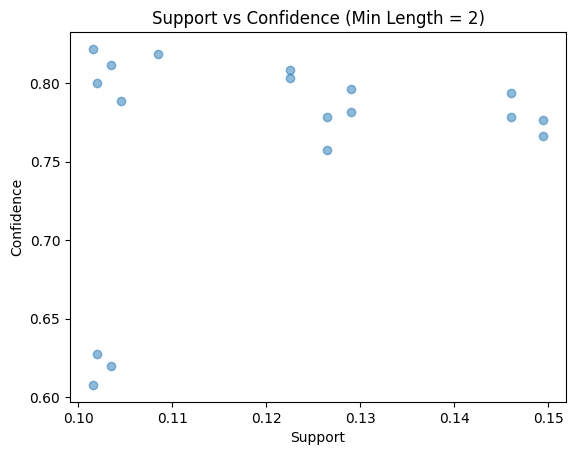

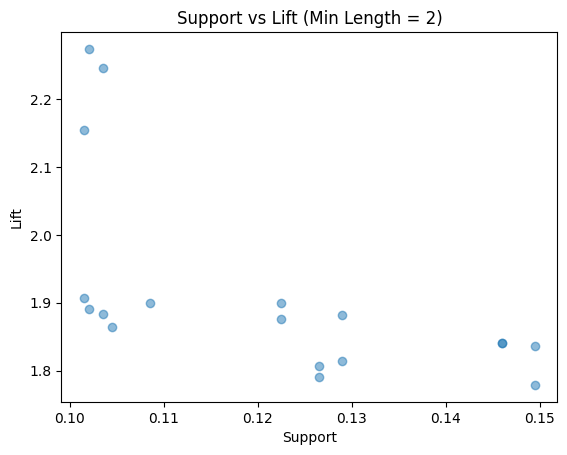

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.1, Confidence=0.6, Min Length=3:

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


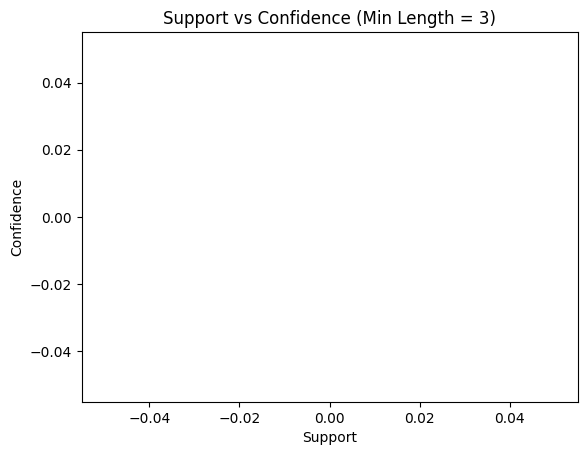

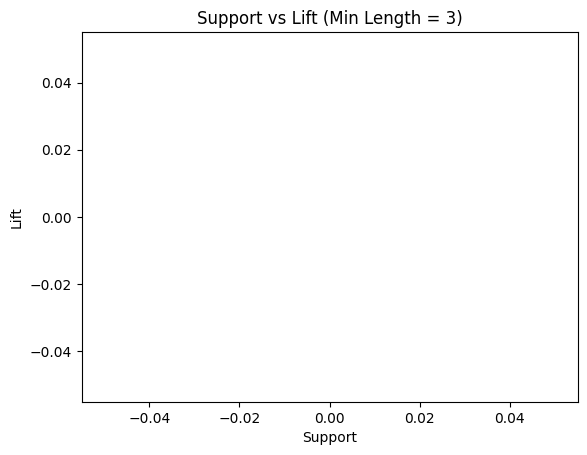

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.1, Confidence=0.7, Min Length=2:

             antecedents consequents  antecedent support  consequent support  \
4   (YouthBks, ChildBks)   (CookBks)              0.1650               0.431   
5    (YouthBks, CookBks)  (ChildBks)              0.1620               0.423   
6   (DoItYBks, ChildBks)   (CookBks)              0.1840               0.431   
7    (DoItYBks, CookBks)  (ChildBks)              0.1875               0.423   
8     (ChildBks, RefBks)   (CookBks)              0.1515               0.431   
9      (RefBks, CookBks)  (ChildBks)              0.1525               0.423   
10    (ChildBks, ArtBks)   (CookBks)              0.1625               0.431   
11     (ArtBks, CookBks)  (ChildBks)              0.1670               0.423   
12   (GeogBks, ChildBks)   (CookBks)              0.1950               0.431   
13    (GeogBks, CookBks)  (ChildBks)              0.1925               0.423   
14   (GeogBks, DoItYBks)  (ChildBks)              0.1325          

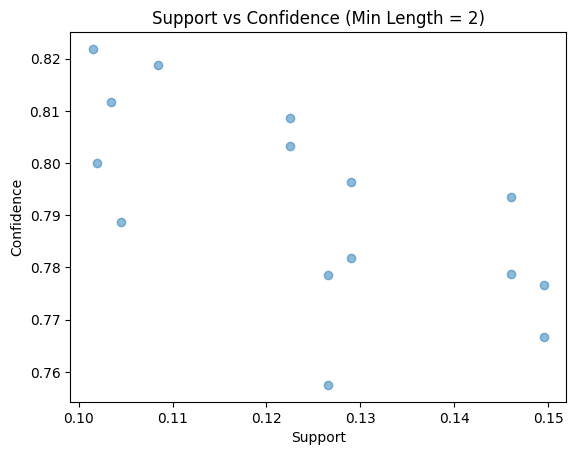

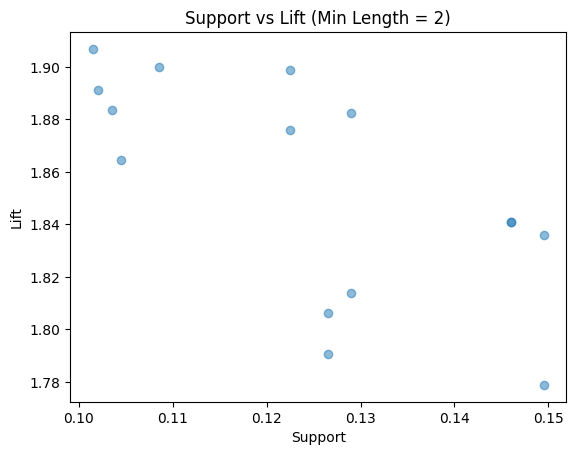

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.1, Confidence=0.7, Min Length=3:

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


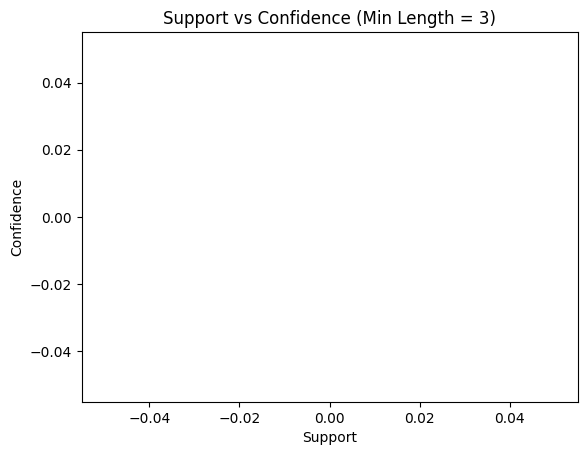

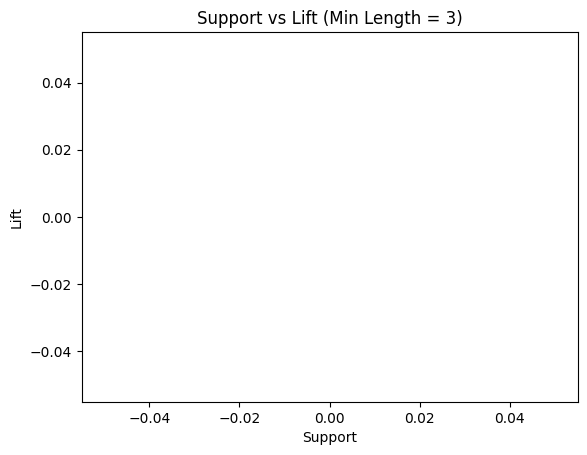

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.2, Confidence=0.5, Min Length=2:

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


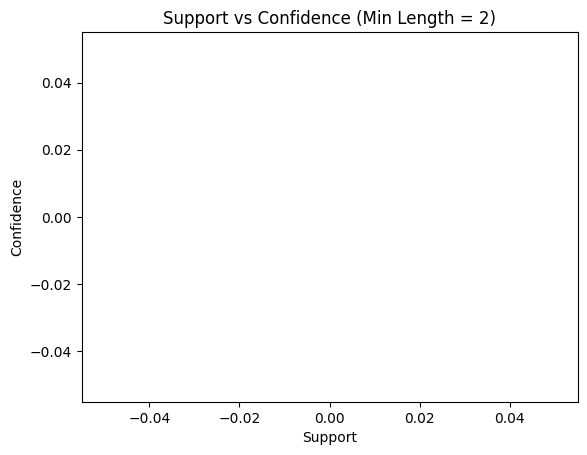

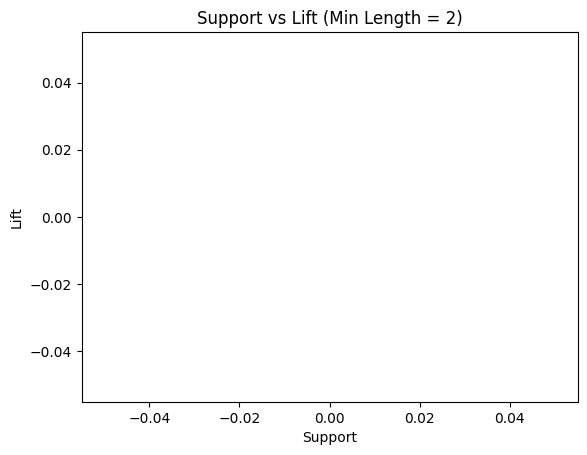

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.2, Confidence=0.5, Min Length=3:

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


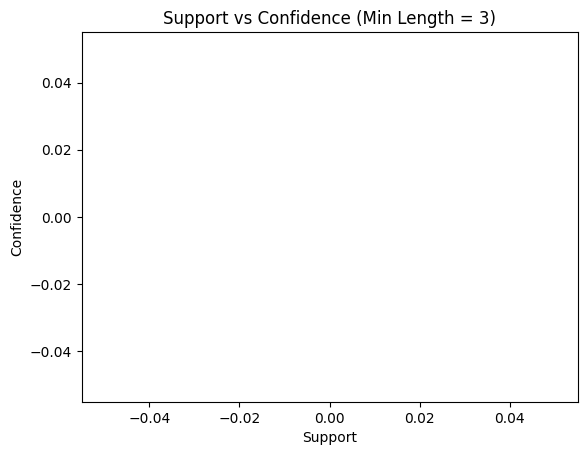

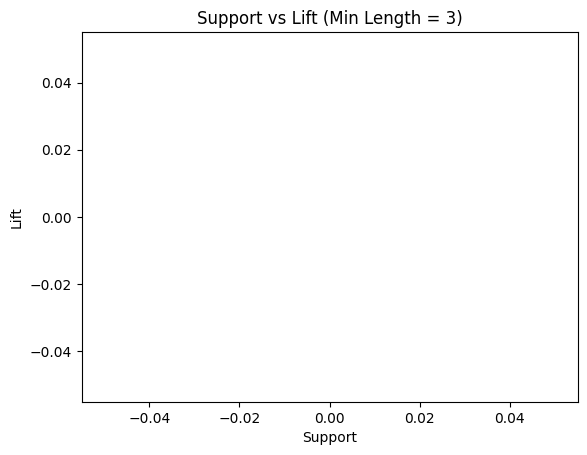

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.2, Confidence=0.6, Min Length=2:

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


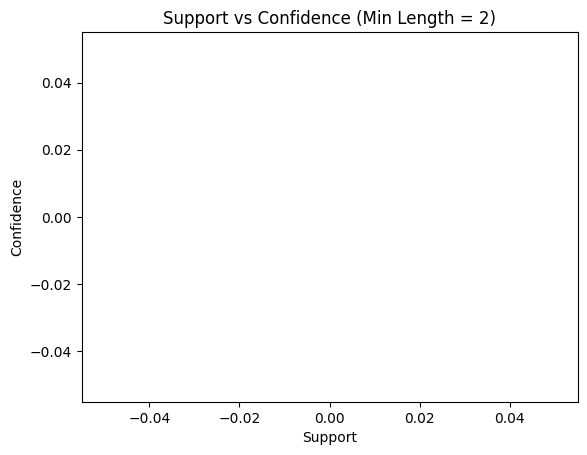

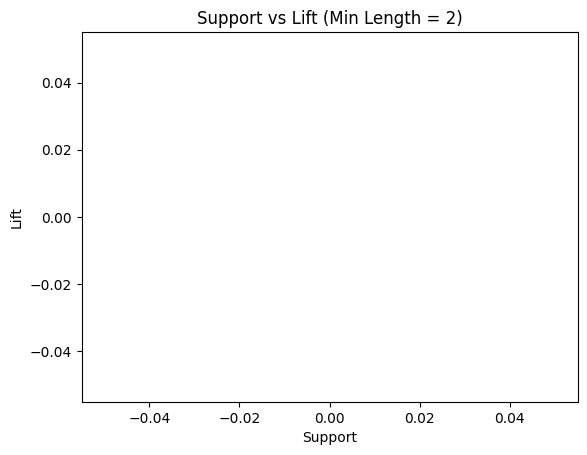

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.2, Confidence=0.6, Min Length=3:

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


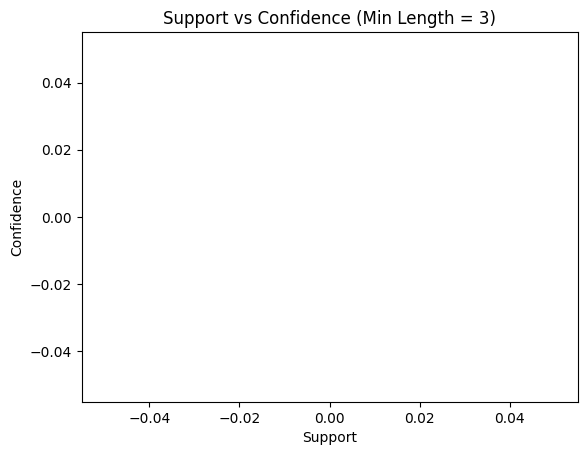

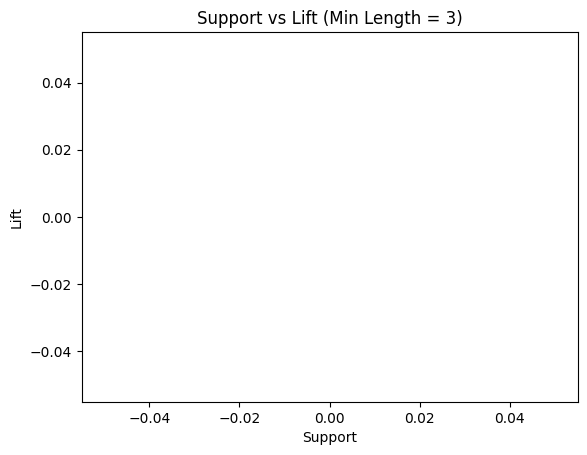

Rules for Support=0.2, Confidence=0.7, Min Length=2:

Empty DataFrame
Columns: []
Index: []
Insufficient data for visualization.
Rules for Support=0.2, Confidence=0.7, Min Length=3:

Empty DataFrame
Columns: []
Index: []
Insufficient data for visualization.
Rules for Support=0.3, Confidence=0.5, Min Length=2:

Empty DataFrame
Columns: []
Index: []
Insufficient data for visualization.
Rules for Support=0.3, Confidence=0.5, Min Length=3:

Empty DataFrame
Columns: []
Index: []
Insufficient data for visualization.
Rules for Support=0.3, Confidence=0.6, Min Length=2:

Empty DataFrame
Columns: []
Index: []
Insufficient data for visualization.
Rules for Support=0.3, Confidence=0.6, Min Length=3:

Empty DataFrame
Columns: []
Index: []
Insufficient data for visualization.
Rules for Support=0.3, Confidence=0.7, Min Length=2:

Empty DataFrame
Columns: []
Index: []
Insufficient data for visualization.
Rules for Support=0.3, Confidence=0.7, Min Length=3:

Empty DataFrame
Columns: []
Index: []
Insuf

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in wors

In [ ]:
# Example usage
support_values = [0.1, 0.2, 0.3]
confidence_values = [0.5, 0.6, 0.7]
min_length_values = [2, 3]

for min_support in support_values:
    for min_confidence in confidence_values:
        for min_len in min_length_values:
            mine_and_visualize_rules(df, min_support, min_confidence, min_len)